\# Welcome to CS 5242 **Assignment 1**

ASSIGNMENT DEADLINE ⏰ : **23:59 06 Sept 2024**

In this assignment, the task is to implement Multi-Layer Perceptron (MLP) for predicting the price of houses in Boston from scratch.

Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. In this semester, we will use Colab to run our experiments.

> In this assignment, there is no need to use GPU.

### **Grades Policy**

We have 10 points for this assignment. 15% off per day late, 0 scores if you submit it 7 days after the deadline.

### **Cautions**

**DO NOT** use external libraries like PyTorch or TensorFlow in your implementation.

**DO NOT** copy the code from the internet, e.g. GitHub.

---

### **Contact**

Please feel free to contact us if you have any question about this assignment or need any further information.

TA Email: zhangg@u.nus.edu


## Setup

Start by running the cell below to set up all required software.

In [ ]:
# !pip install numpy matplotlib scikit-learn

Import the neccesary library.

In [1]:
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

Everything is ready, you can move on and ***Good Luck !*** 😃

## Explore Boston Housing Dataset

One of the first steps when working with a new data set is exploring.The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

First, we download the dataset from the Internet.

In [3]:
# !mkdir -p data \
#     && cd data \
#     && wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data \
#     && ls -l .

# Prefer to store at 1 level up of this notebook

!mkdir -p ../data \
    && cd ../data \
    && wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data \
    && ls -l .

total 96
-rw-r--r--  1 hanyuwu  staff  49082 Aug 31 16:13 housing.data


The next thing to do is to reformat the data. Now we reshape the data into a (num_sample, num_features) array.

In [4]:
datafile = '../data/housing.data'
data = np.fromfile(datafile, sep=' ')
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(data.shape)
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])
print(data.shape)

(7084,)
(506, 14)


One important step of data processing is to rescale the features. In this case, we use minmax scaling. After rescaling, the range of the data will become 0-1.

In [5]:
# rescale data using minmax scaling.

def scale_data(X):
    X_scaled = None
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_scaled = (X - X_min) / (X_max - X_min)
    return X_scaled 


Split the dataset into training and test test

In [6]:
ratio = 0.8
offset = int(data.shape[0] * ratio)

In [7]:
x = data[:, :-1]
y = data[:, -1:]
x = scale_data(x)
X_train = x[:offset]
X_test = x[offset:]
Y_train = y[:offset]
Y_test = y[offset:]

An easy to quickly get an idea for how your data looks is to examine the shape of the matrix it's stored using the `.shape` attribute of numpy arrays. We see that the shape of `X_train` is `404 x 13`, which tells us there are `404` samples (images) each with dimension `13`.

In [8]:
print(f"The shape of the training set is: {X_train.shape[0]} x {X_train.shape[1]}")
print(f"The shape of the test set is: {X_test.shape[0]} x {X_test.shape[1]}")

The shape of the training set is: 404 x 13
The shape of the test set is: 102 x 13


Now lets take a look at how the samples are represented, we can do this by calling `Y_train[index]` and `X_train[index]` (here I choose `index=0` to look at the very first sample). We first notice `Y_train[0]=24`, meaning this entry is a house worthy of 24. The data type of the numpy array is float64 by default.

In [9]:
index = 0
print(f"Y_train[{index}]: {Y_train[index]}")
print(X_train[index])
print(X_train[index].dtype)

Y_train[0]: [24.]
[0.         0.18       0.06781525 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.20801527 0.28723404 1.
 0.08967991]
float64


We can also check how related the features are with the house price.

         CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
399  0.111389  0.00  0.646628   0.0  0.633745  0.438973  0.771370  0.033719   
400  0.281441  0.00  0.646628   0.0  0.633745  0.464840  1.000000  0.041757   
401  0.159940  0.00  0.646628   0.0  0.633745  0.533052  1.000000  0.040420   
402  0.107782  0.00  0.646628   0.0  0.633745  0.544740  1.000000  0.046322   
403  0.278694  0.00  0.646628   0.0  0.633745  0.342594  0.958805  0.052124   

          RAD       TAX   PTRATIO         B     LST

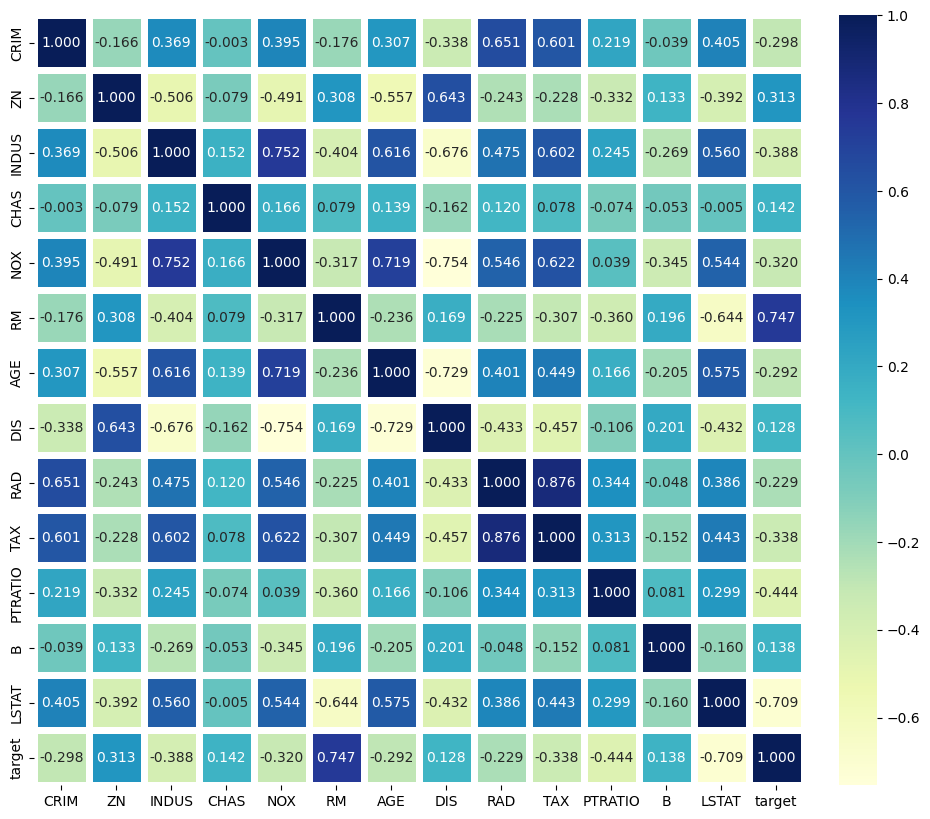

In [10]:
housedatadf=pd.DataFrame(data=X_train,columns=feature_names[:-1])
housedatadf["target"]=Y_train
print(housedatadf)
datacor=np.corrcoef(housedatadf.values,rowvar=0)
datacor=pd.DataFrame(data=datacor,columns=housedatadf.columns,index=housedatadf.columns)
plt.figure(figsize=(15,10))
ax=sns.heatmap(datacor,square=True,annot=True,fmt=".3f",linewidths=5,cmap="YlGnBu",cbar_kws={"fraction":0.046,"pad":0.03})
plt.show()

### Manual feature engineering
From the above heat map, please

(1) find the 3 feature names which are less useful for predicting house price from the original dataset, and give a brief explaination

(2) exclude them from the original `X_train` and `X_test`

In [11]:
#########Enter the 3 feature names here#########  (One point)
least_related_features = datacor["target"].abs().sort_values(ascending=True).head(3).index.tolist()
indices = feature_names.index(least_related_features[0]), feature_names.index(least_related_features[1]), feature_names.index(least_related_features[2])
"""
Explain the reason:
Since we are implementing a 1 layer MLP without any non-linear activation function,
its equivalent to a linear regression model. Hence the least related features
can be inferred from the correlation matrix. The least related features are the ones
with the least correlation with the target variable.
"""
#########Code end#########
X_train = np.delete(X_train, indices, axis=1)
X_test = np.delete(X_test, indices, axis=1)
#########Enter your code here#########  (One point)

#########Code end#########
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}")

X_train.shape: (404, 10), X_test.shape: (102, 10)


## Implementation of Multilayer perceptron

We'll first go through and write the code for each piece of an MLP in generic Python functions. We'll then wrap everything in an `MLP` class, which will allow us to easily access all the MLP functionality in a user friendly manner.

### Training

You have **three tasks** in this section.
1. You need to implement `__init__` function
1. You need to implement `mse_loss` function
2. You need to implement `forward` function.
3. You need to implement `backward` function.
4. You need to implement the main loop of `train` function.

In [ ]:
class MLP(object):
    def __init__(self, num_of_weights: int, learning_rate: float=0.01):
        """Initialize the MLP model with the given number of weights and learning rate.

        Args:
            num_of_weights (int): equivalent to the number of features in the dataset.
            learning_rate (float, optional): scalar multiplier for the gradient. Defaults to 0.01.
        """
        
        # np.random.seed(42)
        # I feel it's better to use the default_rng to avoid the global state of np.random
        
        rng = np.random.default_rng(42)
        self.learning_rate = learning_rate
        self.weight = rng.normal(loc=0.0, scale=0.1, size=(num_of_weights, 1))
        self.bias = np.zeros((1, 1))


    def mse_loss(self, y_pred:np.array, y:np.array) -> float:
        """Using the mean squared error loss function to calculate the loss.

        Args:
            y_pred (np.array): array of predicted values.
            y (np.array): array of true values.

        Returns:
            float: mean squared error loss.
        """
        loss_ = np.mean((y - y_pred) ** 2)
        return loss_

    def forward(self, x):

        #########Enter your code here#########  (One points)
        out_ = np.dot(x, self.weight) + self.bias
        #########Code end#########
        return out_

    def backward(self, x:np.array, y_pred: np.array, y: np.array) -> None:
        """Backward propagation to update the weights and bias.

        Args:
            x (np.array): input feature array.
            y_pred (np.array): predicted values.
            y (np.array): true values.
        """
        grad_ = 2 * (y_pred - y)
        grad_w = np.dot(x.T, grad_)
        grad_b = np.sum(grad_)
        
        # gradient clipping to prevent overflow
        grad_w = np.clip(grad_w, -1, 1)
        grad_b = np.clip(grad_b, -1, 1)
        
        self.weight -= self.learning_rate * grad_w
        self.bias -= self.learning_rate * grad_b
        
        
        # SGD is probably not necessary in this method because the mini batch is already being used in the train method.
        # Nonetheless, it can be implemented as follows:
        
        # for i in range(x.shape[0]):
        #     grad_w = np.dot(x[i].reshape(-1, 1), grad_[i].reshape(1, -1))
        #     grad_b = grad_[i]
            
        #     # Gradient clipping to prevent overflow
        #     grad_w = np.clip(grad_w, -1, 1)
        #     grad_b = np.clip(grad_b, -1, 1)
            
        #     self.weight -= self.learning_rate * grad_w
        #     self.bias -= self.learning_rate * grad_b
        


    def train(self, X, Y, num_epoches, batch_size):
        n_samples = len(X)
        losses = []
        for epoch_id in range(num_epoches):
            shuffle = np.random.permutation(n_samples)
            X_batches = np.array_split(X[shuffle], n_samples / batch_size)
            Y_batches = np.array_split(Y[shuffle], n_samples / batch_size)
            iter_id = 0
            for batch_x, batch_y in zip(X_batches, Y_batches):
                #########Enter your code here######### (One point)
                out_ = self.forward(batch_x)
                loss = self.mse_loss(out_, batch_y)
                self.backward(batch_x, out_, batch_y)
                losses.append(loss)

                #########Code end#########
                print('Epoch {:3d} / iter {:3d}, loss={:4f}'.format(epoch_id + 1, iter_id, loss))
                iter_id += 1
        return losses

Great, now let's give this a try. Let's create a really simple MLP. We'll train with a `batch_size=100` for `epochs=50` and a learning rate `lr=0.5`.

In [ ]:
network = MLP(10, 0.5)
losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

Now we can check the performance on the test set!

In [ ]:
Y_pred=network.forward(X_test)
# mse=mean_absolute_error(y_test,pre_y)
Y_pred = np.squeeze(Y_pred)
Y_test = np.squeeze(Y_test)
index=np.argsort(Y_test)
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(Y_test)),Y_test[index],"r",label="original y")
plt.scatter(np.arange(len(Y_test)),Y_pred[index],s=3,c="b",label="prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("index")
plt.ylabel("y")
plt.show()

## Discussion (1 points)

In this section, you are free to choose some of the following directions to explore, and try to summarize some patterns and conclusions.

* Try to use different learning rates and generalize the impact of learning rate on training.
* Try to use different ways of weight initialization and explore the impact on the convergence and final classification performance.
* Try to use a portion of the data for training (e.g., 10%, 20%, 50%) to explore the training convergence and final classification performance with different amounts of data.

> **NOTE:** *Good Disscusion* include experimental setup, presentation of experimental results including visualization, analysis and interpretation of phenomena, and summary of conclusions

In [ ]:
# === Complete the code (One point)

# === Complete the code

Write down your analysis and conclusions:

